In [1]:
import numpy as np
from scipy.stats import chi2, poisson
from scipy.optimize import brentq
import matplotlib.pyplot as plt

**Problem 1**

In [2]:
alpha = 1 / 137.036
m_tau_given = 1.77686  #GeV

E_cm_values= np.array([3.56, 3.60, 3.64, 3.68, 3.72]) #GeV
measured_cross_sections = np.array([0.53, 1.62, 2.32, 2.40, 2.75])  #nb

Q1

In [3]:
def calculate_expected_cross_section(E_cm, m_tau):
    s = E_cm**2
    E_b = 0.5 * E_cm
    if E_b > m_tau:
        beta = np.sqrt(E_b**2 - m_tau**2) / E_b
    else:
        beta = 0
    sigma = (2 * np.pi * alpha**2 / (3 * s)) * beta * (3 - beta**2)* 0.389379 * 10**6 #GeV^-2 to nb conversion
    return sigma

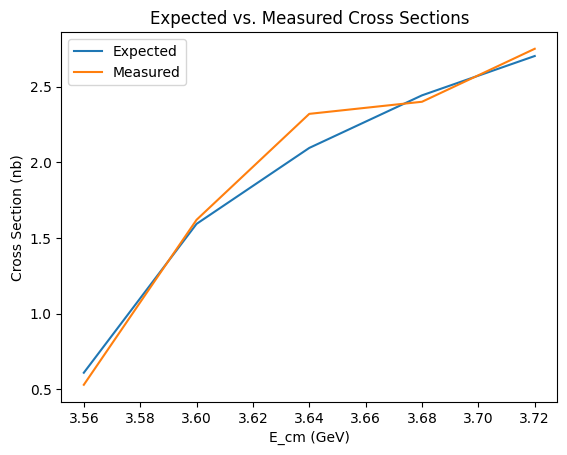

In [4]:
plt.plot(E_cm_values, np.array([calculate_expected_cross_section(E_cm, m_tau_given) for E_cm in E_cm_values]), label='Expected')
plt.plot(E_cm_values, measured_cross_sections, label='Measured')
plt.xlabel('E_cm (GeV)')
plt.ylabel('Cross Section (nb)')
plt.title('Expected vs. Measured Cross Sections')
plt.legend()
plt.show()

In [5]:
def chi_squared(m_tau):
    expected_cross_sections = np.array([calculate_expected_cross_section(E_cm, m_tau) for E_cm in E_cm_values])
    uncertainties = np.maximum(0.01, 0.05 * expected_cross_sections)
    return np.sum((measured_cross_sections - expected_cross_sections)**2 / uncertainties**2)

chi_squared_value = chi_squared(m_tau_given)
print("Chi-Squared:", chi_squared_value)

Chi-Squared: 11.797337135153589


In [6]:
degrees_of_freedom = 5 #5 data points - 0 parameters

p_value = 1 - chi2.cdf(chi_squared_value, degrees_of_freedom)

print("P-Value:", p_value)


P-Value: 0.03767276531965191


Q2

In [7]:
def golden_section_minimization(f, a, b, tol=1e-5):

    phi = (1 + np.sqrt(5)) / 2  #Golden ratio

    c = b - (b - a) / phi
    d = a + (b - a) / phi

    fc = f(c)
    fd = f(d)

    while (b - a) > tol:
        if fc < fd:
            b = d
            d = c
            fd = fc
            c = b - (b - a) / phi
            fc = f(c)
        else:
            a = c
            c = d
            fc = fd
            d = a + (b - a) / phi
            fd = f(d)

    minimum_x = (a + b) / 2
    minimum_f = f(minimum_x)

    return minimum_x, minimum_f

best_fit_mass, min_chi_squared=golden_section_minimization(chi_squared, 1.5, 2.0)
print("Best Fit Mass:", best_fit_mass)
print("Minimum Chi-Squared:", min_chi_squared)

Best Fit Mass: 1.777577698765262
Minimum Chi-Squared: 6.134018699746366


In [8]:
degrees_of_freedom = 4 #5 data points - 1 parameter

p_value = 1 - chi2.cdf(min_chi_squared, degrees_of_freedom)

print("P-Value:", p_value)

P-Value: 0.18936073657138042


Q3

In [9]:
def chi_squared_difference(m_tau):
    return chi_squared(m_tau) - (min_chi_squared + 1)

tau_mass_lower = brentq(chi_squared_difference, 1.0, best_fit_mass)
tau_mass_upper = brentq(chi_squared_difference, best_fit_mass, 2.0)

print(f"Lower bound of 68% CI (±1σ): {tau_mass_lower} GeV")
print("Best Fit Mass:", best_fit_mass)
print(f"Upper bound of 68% CI (±1σ): {tau_mass_upper} GeV")


Lower bound of 68% CI (±1σ): 1.777307767842892 GeV
Best Fit Mass: 1.777577698765262
Upper bound of 68% CI (±1σ): 1.7778050337287203 GeV


**Problem 2**

In [10]:
luminosity = 10  #nb^-1
E_cm_values_2 = np.array([3.540, 3.550, 3.560, 3.570, 3.580, 3.600, 3.620, 3.640, 3.680])  #GeV
observed_events = np.array([1, 2, 4, 8, 10, 18, 20, 22, 26])

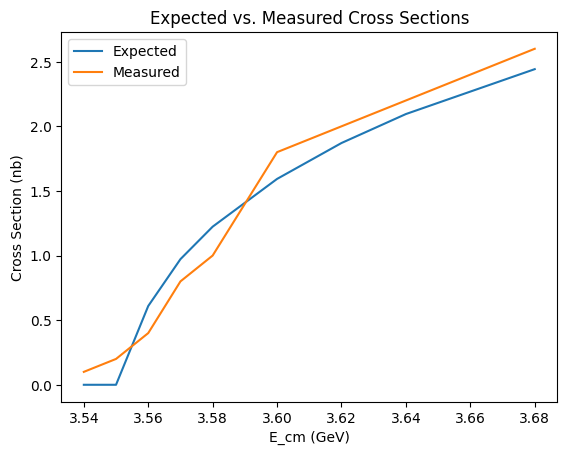

In [11]:
plt.plot(E_cm_values_2, np.array([calculate_expected_cross_section(E_cm, m_tau_given) for E_cm in E_cm_values_2]), label='Expected')
plt.plot(E_cm_values_2, observed_events/luminosity, label='Measured')
plt.xlabel('E_cm (GeV)')
plt.ylabel('Cross Section (nb)')
plt.title('Expected vs. Measured Cross Sections')
plt.legend()
plt.show()

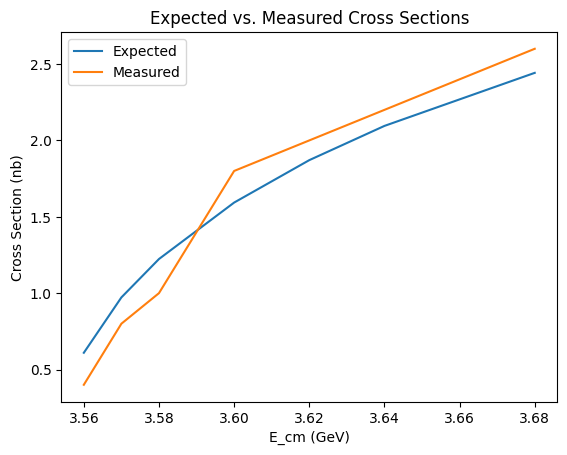

In [12]:
#Removing first two data points because expected cross section is zero since E_b<m_tau

expected_cross_sections = np.array([calculate_expected_cross_section(E_cm, m_tau_given) for E_cm in E_cm_values_2])
expected_cross_sections = expected_cross_sections[2:]

plt.plot(E_cm_values_2[2:], expected_cross_sections, label='Expected')
plt.plot(E_cm_values_2[2:], observed_events[2:]/luminosity, label='Measured')
plt.xlabel('E_cm (GeV)')
plt.ylabel('Cross Section (nb)')
plt.title('Expected vs. Measured Cross Sections')
plt.legend()
plt.show()

Q1

In [13]:
def negative_log_likelihood(m_tau):
    E_b = 0.5 * E_cm_values_2
    expected_cross_sections = np.array([calculate_expected_cross_section(E_cm, m_tau) for E_cm in E_cm_values_2])
    mu_values = expected_cross_sections[2:] * luminosity
    L_prime = -2 * np.sum(np.log(poisson.pmf(len(observed_events)-2,mu_values))) #Removing first two zero values

    return L_prime

l_prime_min_mass, l_prime_min=golden_section_minimization(negative_log_likelihood, 1.5, 1.78)
l_prime_given=negative_log_likelihood(m_tau_given)
l_prime_min_chi_squared=negative_log_likelihood(best_fit_mass)

print(f"Most likely mass: {l_prime_min_mass}")
print(f"Minimized negative log likelihood: {l_prime_min}")
print(f"Negative log likelihood for given tau mass: {l_prime_given}")
print(f"Negative log likelihood for tau mass with minimum chi squared: {l_prime_min_chi_squared}")

Most likely mass: 1.778541005590813
Minimized negative log likelihood: 74.33418580286866
Negative log likelihood for given tau mass: 76.18477675807978
Negative log likelihood for tau mass with minimum chi squared: 75.08092884233477


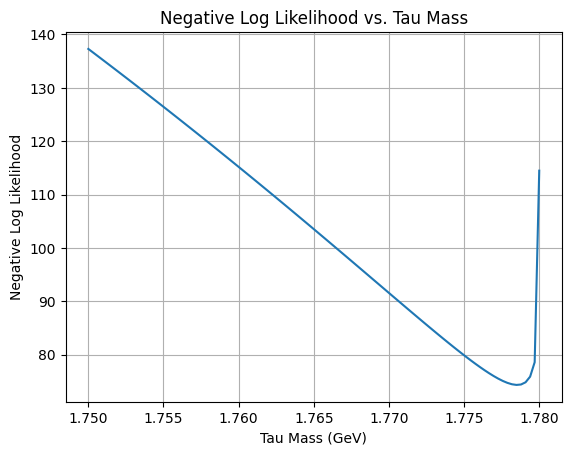

In [14]:
likelihood_values = [negative_log_likelihood(m) for m in np.linspace(1.75, 1.779999, 100)] #Argument for log becomes 0 sometime after this point
plt.plot(np.linspace(1.75, 1.779999, 100), likelihood_values)
plt.xlabel("Tau Mass (GeV)")
plt.ylabel("Negative Log Likelihood")
plt.title("Negative Log Likelihood vs. Tau Mass")
plt.grid(True)
plt.show()

Q2

In [15]:
def l_prime_difference(m_tau):
    return negative_log_likelihood(m_tau) - (l_prime_min + 1)

tau_mass_lower_l_prime = brentq(l_prime_difference, 1.0, l_prime_min_mass)
tau_mass_upper_l_prime = brentq(l_prime_difference, l_prime_min_mass, 1.779999)

print(f"Lower bound of 68% CI (±1σ): {tau_mass_lower_l_prime} GeV")
print("Best Fit Mass:", l_prime_min_mass)
print(f"Upper bound of 68% CI (±1σ): {tau_mass_upper_l_prime} GeV")

Lower bound of 68% CI (±1σ): 1.7773939532131129 GeV
Best Fit Mass: 1.778541005590813
Upper bound of 68% CI (±1σ): 1.7792661570827175 GeV


**Problem 3**

In [ ]:
Q1

In [16]:
def negative_log_likelihood_with_bg(m_tau):
    E_b = 0.5 * E_cm_values_2
    expected_cross_sections = np.array([calculate_expected_cross_section(E_cm, m_tau) for E_cm in E_cm_values_2])
    mu_values = expected_cross_sections[2:] * luminosity + 1.0 #constant background
    L_prime = -2 * np.sum(np.log(poisson.pmf(len(observed_events)-2,mu_values)))

    return L_prime

l_prime_min_mass_with_bg, l_prime_min_with_bg=golden_section_minimization(negative_log_likelihood_with_bg, 1.5, 1.78)
l_prime_given_with_bg=negative_log_likelihood_with_bg(m_tau_given)
l_prime_min_chi_squared_with_bg=negative_log_likelihood_with_bg(best_fit_mass)

print(f"Most likely mass with constant background: {l_prime_min_mass_with_bg}")
print(f"Minimized negative log likelihood with constant background: {l_prime_min_with_bg}")
print(f"Negative log likelihood with constant background for given tau mass: {l_prime_given_with_bg}")
print(f"Negative log likelihood with constant background for tau mass with minimum chi squared: {l_prime_min_chi_squared_with_bg}")

Most likely mass with constant background: 1.7790441123007859
Minimized negative log likelihood with constant background: 79.42586959386267
Negative log likelihood with constant background for given tau mass: 82.79157544247741
Negative log likelihood with constant background for tau mass with minimum chi squared: 81.2986256672132


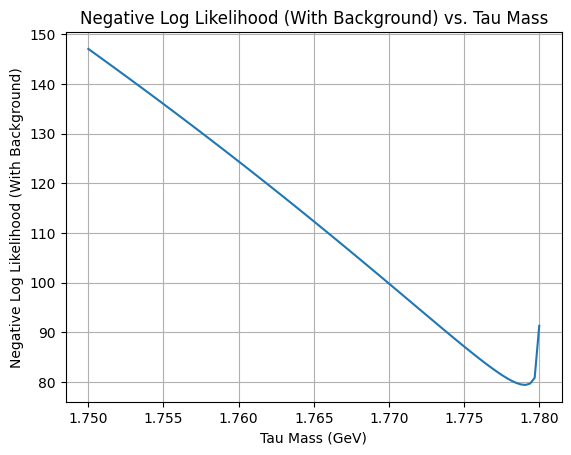

In [17]:
likelihood_values_with_bg = [negative_log_likelihood_with_bg(m) for m in np.linspace(1.75, 1.78, 100)]
plt.plot(np.linspace(1.75, 1.78, 100), likelihood_values_with_bg)
plt.xlabel("Tau Mass (GeV)")
plt.ylabel("Negative Log Likelihood (With Background)")
plt.title("Negative Log Likelihood (With Background) vs. Tau Mass")
plt.grid(True)
plt.show()

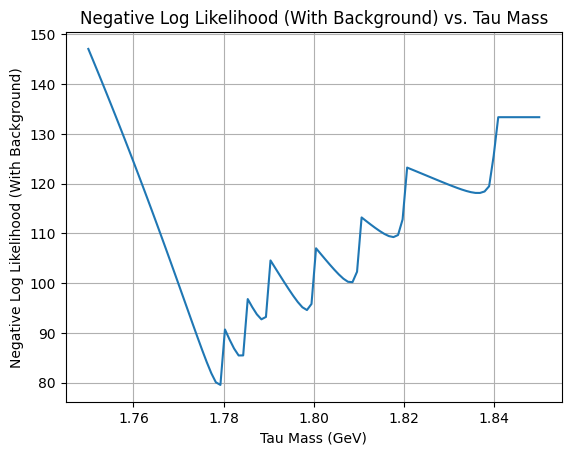

In [18]:
 #Not sure why this behaviour is strange, but minima in this region remains unchanged

likelihood_values_with_bg = [negative_log_likelihood_with_bg(m) for m in np.linspace(1.75, 1.85, 100)]
plt.plot(np.linspace(1.75, 1.85, 100), likelihood_values_with_bg)
plt.xlabel("Tau Mass (GeV)")
plt.ylabel("Negative Log Likelihood (With Background)")
plt.title("Negative Log Likelihood (With Background) vs. Tau Mass")
plt.grid(True)
plt.show()

Q2

In [19]:
def l_prime_difference_with_bg(m_tau):
    return negative_log_likelihood_with_bg(m_tau) - (l_prime_min_with_bg + 1)

tau_mass_lower_l_prime_with_bg = brentq(l_prime_difference_with_bg, 1.0, l_prime_min_mass_with_bg)
tau_mass_upper_l_prime_with_bg = brentq(l_prime_difference_with_bg, l_prime_min_mass_with_bg, 1.779999)

print(f"Lower bound of 68% CI (±1σ): {tau_mass_lower_l_prime_with_bg} GeV")
print("Best Fit Mass:", l_prime_min_mass_with_bg)
print(f"Upper bound of 68% CI (±1σ): {tau_mass_upper_l_prime_with_bg} GeV")

Lower bound of 68% CI (±1σ): 1.7780620637869098 GeV
Best Fit Mass: 1.7790441123007859
Upper bound of 68% CI (±1σ): 1.7796224644358725 GeV
